# Data Preparation

Data Obtained From:
https://www.kaggle.com/azeembootwala/titanic?select=test_data.csv

In [1]:
# Libraries (Default)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


# Ignore useless warning
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Import Titanic train data
t1 = '/Users/roywong//Desktop/Work_Stuff/PythonPortfolio/4.Titanic/train.csv'
train = pd.read_csv(t1)

# Import the test Data
t2 = '/Users/roywong//Desktop/Work_Stuff/PythonPortfolio/4.Titanic/test.csv'
test = pd.read_csv(t2)



# Combining the dataset
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
full_data = pd.concat([train,test])

# Exploration

- Histograms to understand distribution
- Corr plot to understand correlation between 
- Pivot table to compare survivability

In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
train_test,891.0,1.000000,0.000000,1.00,1.0000,1.0000,1.0,1.0000


In [4]:
train.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Collander, Mr. Erik Gustaf",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [5]:
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [6]:
# Group variables into numericals and categoricals
train_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

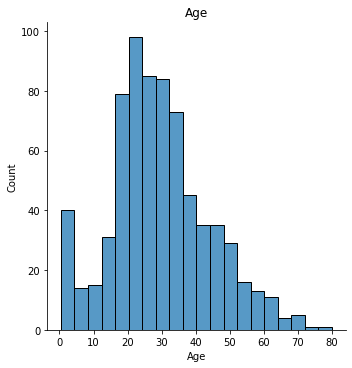

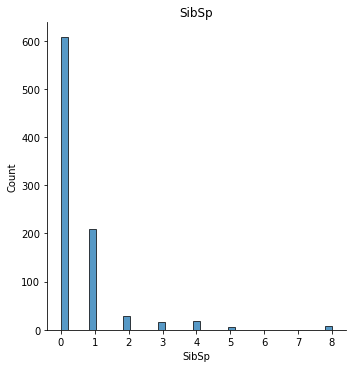

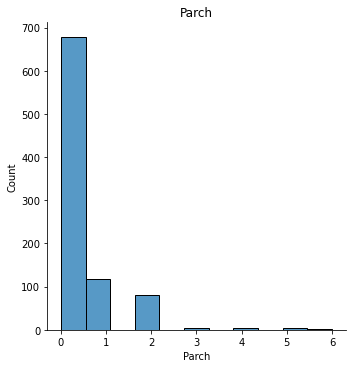

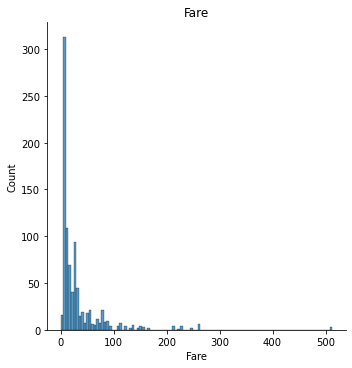

In [7]:
# Plotting histogram to view distributions
for i in train_num.columns:
    sns.displot(train_num[i])
    plt.title(i)
    plt.show()

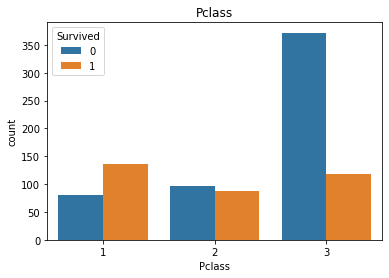

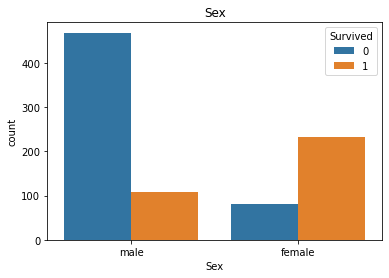

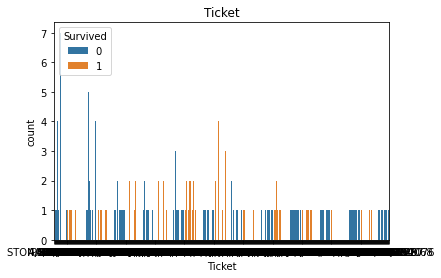

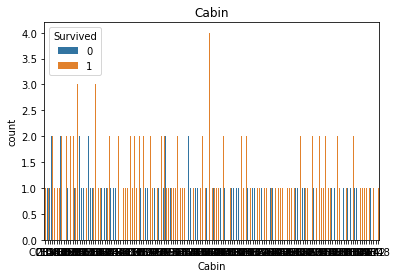

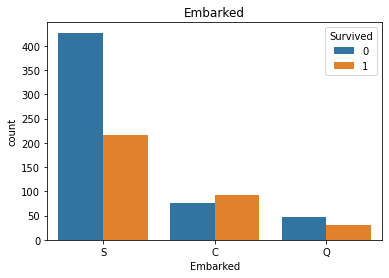

In [8]:
for i in train_cat.columns[1:]:
    sns.countplot(x = train_cat[i], hue='Survived', data=train_cat)
    plt.title(i)
    plt.show()

<AxesSubplot:>

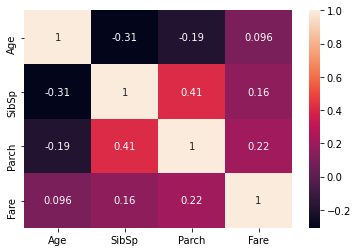

In [9]:
sns.heatmap(train_num.corr(), annot=True)

In [10]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


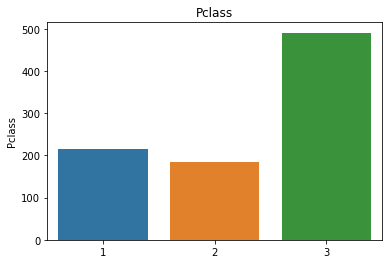

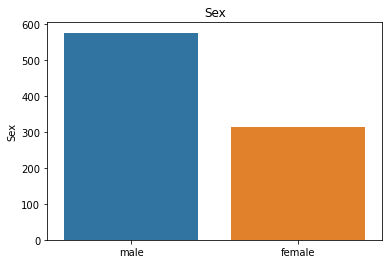

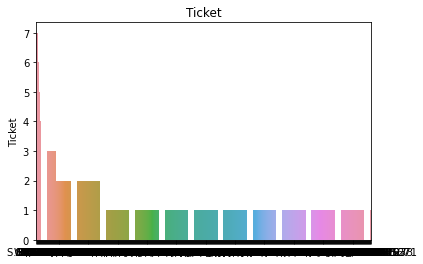

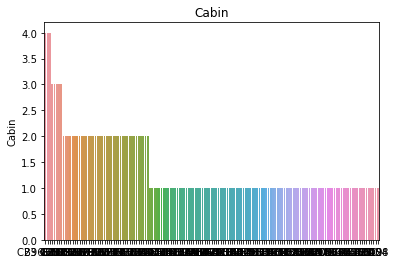

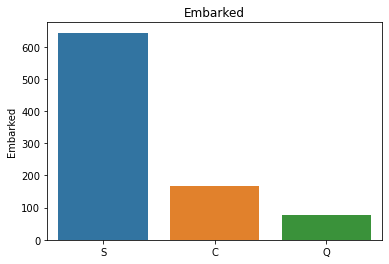

In [11]:
for i in train_cat.columns[1:]:
    sns.barplot(train_cat[i].value_counts().index, train_cat[i].value_counts()).set_title(i)
    plt.show()

In [12]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering 

- Creating new feature to make more accurate predictions

- Checking on Cabin columns
    - for some passengers may have multiple cabins

In [13]:
train_Cab = train.Cabin
train['No_cabin'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

#Checking on the new feature 
train.No_cabin.value_counts()

0    687
1    180
2     16
3      6
4      2
Name: No_cabin, dtype: int64

In [14]:
pd.pivot_table(train, index = 'Survived', columns = 'No_cabin', values = 'Ticket' ,aggfunc ='count')

No_cabin,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [15]:
train['Cabin_Cat'] = train.Cabin.apply(lambda x: str(x)[0].upper())

# Split the categories by the first index of the string
train.Cabin_Cat.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Cat, dtype: int64

In [16]:
pd.pivot_table(train, index = 'Survived', columns = 'Cabin_Cat', values = 'Ticket' ,aggfunc ='count')

Cabin_Cat,A,B,C,D,E,F,G,N,T
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,481.0,1.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,206.0,NaN


In [17]:
pd.pivot_table(train, index = 'Survived', columns = 'SibSp', values = 'Ticket' ,aggfunc ='count')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


In [18]:
train['Fam_Size'] = train.SibSp + train.Parch + 1

<AxesSubplot:xlabel='Fam_Size', ylabel='count'>

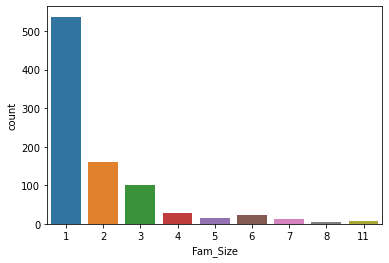

In [19]:
sns.countplot(x=train['Fam_Size'], data=train)

## Feature Engineering on Title

In [20]:
train['Title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Data Preparation for modelling

- Using all the features engineered above on all the concatenated data
- Impute all the missing and dropping the null data set

In [21]:
# Apply the same result on all the concatenated data
full_data['No_cabin'] = full_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
full_data['Cabin_Cat'] = full_data.Cabin.apply(lambda x: str(x)[0].upper())


# New Feature (i.e. Fam_Size)
full_data['Fam_Size'] = full_data.SibSp + full_data.Parch + 1


# New Feature (i.e. Title)
full_data['Title'] = full_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())


# Impute Missing Values for continuous data
full_data.Age = full_data.Age.fillna(train.Age.median())
full_data.Fare = full_data.Fare.fillna(train.Fare.median())


# Drop null 'embarked' rows. 
# Since there are only 2 instances of this in train set and 0 in test 
full_data.dropna(subset=['Embarked'],inplace = True)


# log norm of fare (used)
# using log(x+1)
full_data['norm_fare'] = np.log(full_data.Fare+1)


# converted fare to category for pd.get_dummies()
full_data.Pclass = full_data.Pclass.astype(str)


#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(full_data[['Pclass','Sex','Age','SibSp','Parch', 'Fam_Size', 'norm_fare','Embarked',
                                       'Cabin_Cat','No_cabin','Title','train_test']])


#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = full_data[full_data.train_test==1].Survived
y_train.shape

(889,)

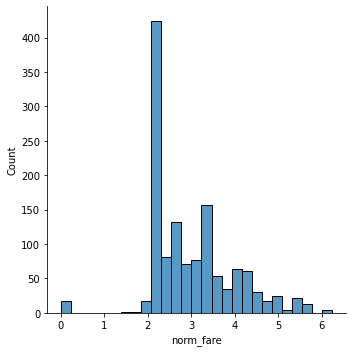

In [22]:
sns.displot(full_data.norm_fare)

Using the logarithmic function (i.e. log(x+1)), the distribution of the fare ticket looks more normalised

In [23]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled



X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)



y_train = full_data[full_data.train_test==1].Survived

# Modelling 

### Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
cv_NB = cross_val_score(gnb,X_train_scaled,y_train,cv=10)
print(cv_NB)
print(cv_NB.mean())
gnb.fit(X_train, y_train)

[0.65168539 0.70786517 0.6741573  0.75280899 0.83146067 0.7752809
 0.79775281 0.71910112 0.74157303 0.73863636]
0.7390321756894791


GaussianNB()

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv_lr1 = cross_val_score(lr,X_train,y_train,cv=10)
print(cv_lr1)
print(cv_lr1.mean())
lr.fit(X_train, y_train)

[0.80898876 0.83146067 0.7752809  0.86516854 0.82022472 0.7752809
 0.83146067 0.83146067 0.86516854 0.86363636]
0.8268130745658835


LogisticRegression(max_iter=2000)

In [26]:
lr = LogisticRegression(max_iter = 2000)
cv_lr_scaled = cross_val_score(lr,X_train_scaled,y_train,cv=10)
print(cv_lr_scaled)
print(cv_lr_scaled.mean())
lr.fit(X_train, y_train)

[0.80898876 0.83146067 0.7752809  0.86516854 0.82022472 0.7752809
 0.83146067 0.83146067 0.86516854 0.86363636]
0.8268130745658835


LogisticRegression(max_iter=2000)

### Decision Tree Classifier

In [27]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt,X_train_scaled,y_train,cv=10)
print(cv_dt)
print(cv_dt.mean())
dt.fit(X_train, y_train)

[0.71910112 0.80898876 0.73033708 0.80898876 0.78651685 0.76404494
 0.82022472 0.69662921 0.80898876 0.78409091]
0.772791113381001


DecisionTreeClassifier(random_state=1)

In [28]:
# cross validation with scaled data
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt_scaled = cross_val_score(dt,X_train_scaled,y_train,cv=10)
print(cv_dt_scaled)
print(cv_dt_scaled.mean())
dt.fit(X_train, y_train)

[0.71910112 0.80898876 0.73033708 0.80898876 0.78651685 0.76404494
 0.82022472 0.69662921 0.80898876 0.78409091]
0.772791113381001


DecisionTreeClassifier(random_state=1)

### K Nearest Neighbor

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn,X_train,y_train,cv=10)
print(cv_knn)
print(cv_knn.mean())
knn.fit(X_train, y_train)

[0.73033708 0.79775281 0.78651685 0.85393258 0.83146067 0.7752809
 0.85393258 0.83146067 0.85393258 0.84090909]
0.8155515832482125


KNeighborsClassifier()

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv_rf = cross_val_score(rf,X_train_scaled,y_train,cv=10)
print(cv_rf)
print(cv_rf.mean())
rf.fit(X_train, y_train)

[0.75280899 0.83146067 0.76404494 0.83146067 0.82022472 0.85393258
 0.78651685 0.74157303 0.86516854 0.85227273]
0.8099463738508682


RandomForestClassifier(random_state=1)

### Support Vector Classifier

In [31]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv_svc = cross_val_score(svc,X_train_scaled,y_train,cv=10)
print(cv_svc)
print(cv_svc.mean())
svc.fit(X_train, y_train)

[0.82022472 0.85393258 0.76404494 0.87640449 0.83146067 0.80898876
 0.82022472 0.78651685 0.86516854 0.86363636]
0.8290602655771195


SVC(probability=True)

### Xtreme Gradient Boosting

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv_xgb = cross_val_score(xgb,X_train_scaled,y_train,cv=10)
print(cv_xgb)
print(cv_xgb.mean())
xgb.fit(X_train, y_train)

[0.76404494 0.80898876 0.71910112 0.84269663 0.86516854 0.83146067
 0.82022472 0.7752809  0.87640449 0.84090909]
0.8144279877425944


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Voting Classifier

In [33]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),
                                            ('svc',svc),('xgb',xgb)], voting = 'soft') 

In [34]:
cv_vote = cross_val_score(voting_clf,X_train_scaled,y_train,cv=10)
print(cv_vote)
print(cv_vote.mean())
voting_clf.fit(X_train_scaled,y_train)

[0.79775281 0.84269663 0.75280899 0.86516854 0.85393258 0.85393258
 0.80898876 0.82022472 0.88764045 0.84090909]
0.8324055158324821


VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=2000)),
                             ('knn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier(random_state=1)),
                             ('gnb', GaussianNB()),
                             ('svc', SVC(probability=True)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1

# Model Evaluation

In [35]:
# created Data Frame for mean scores for all the models used above 
models_scores = pd.DataFrame({'Models' : ['Gaussian Naive Bayes', 'Logistic Regression', 'Decision Tree Classifier',
                                       ' K Nearest Neighbor', 'Random Forest Classifier', 'Support Vector Classifier', 
                                        'Xtreme Gradient Boosting', 'Voting Classifier'],
                            'CV_Mean' : [cv_NB.mean(), cv_lr1.mean(), cv_dt.mean(), cv_knn.mean(), cv_rf.mean(),
                                     cv_svc.mean(), cv_xgb.mean(), cv_vote.mean()],
                              'CV_Std' : [cv_NB.std(), cv_lr1.std(), cv_dt.std(), cv_knn.std(), cv_rf.std(),
                                     cv_svc.std(), cv_xgb.std(), cv_vote.std()],
                             'Training_Accuracy' : [gnb.score(X_train, y_train), lr.score(X_train, y_train), dt.score(X_train, y_train),
                                        knn.score(X_train, y_train), rf.score(X_train, y_train), svc.score(X_train, y_train),
                                        xgb.score(X_train, y_train), voting_clf.score(X_train_scaled,y_train)]})

In [36]:
# Order the models by Scores Accuracy values
models_scores.sort_values(by = 'Training_Accuracy', ascending=False)

,Models,CV_Mean,CV_Std,Training_Accuracy
2,Decision Tree Classifier,0.772791,0.041302,0.984252
4,Random Forest Classifier,0.809946,0.042898,0.984252
6,Xtreme Gradient Boosting,0.814428,0.046290,0.966254
7,Voting Classifier,0.832406,0.036691,0.911136
3,K Nearest Neighbor,0.815552,0.039511,0.851519
1,Logistic Regression,0.826813,0.031679,0.838020
5,Support Vector Classifier,0.829060,0.034585,0.778403
0,Gaussian Naive Bayes,0.739032,0.051680,0.758155


In [37]:
# Order the models by Cross validation mean values
models_scores.sort_values(by = 'CV_Mean', ascending=False)

,Models,CV_Mean,CV_Std,Training_Accuracy
7,Voting Classifier,0.832406,0.036691,0.911136
5,Support Vector Classifier,0.829060,0.034585,0.778403
1,Logistic Regression,0.826813,0.031679,0.838020
3,K Nearest Neighbor,0.815552,0.039511,0.851519
6,Xtreme Gradient Boosting,0.814428,0.046290,0.966254
4,Random Forest Classifier,0.809946,0.042898,0.984252
2,Decision Tree Classifier,0.772791,0.041302,0.984252
0,Gaussian Naive Bayes,0.739032,0.051680,0.758155


# Model Tunning

In [38]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [39]:
params = {'C' : [0.1, 1, 10, 100, 1000],
         'gamma' : [1, 0.1, 0.01, 0.001],
         'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), params, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.618, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.629, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.663, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.663, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.644, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.640, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.781, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.808, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.781, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.809, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.815, total=   0.1s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=3)

In [40]:
print(grid.best_estimator_)
grid.best_params_

SVC(C=10, gamma=0.01)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [50]:
# C=10
svc_10 = SVC(C=10, gamma = 0.01, kernel = 'rbf')
svc_10.fit(X_train, y_train)
acc_10 = svc_10.score(X_train, y_train)*100
acc_10

84.92688413948257

In [51]:
# C=100
svc_100 = SVC(C=100, gamma = 0.01, kernel = 'rbf')
svc_100.fit(X_train, y_train)
acc_100 = svc_100.score(X_train, y_train)*100
acc_100

88.30146231721034

In [52]:
cv_svc = cross_val_score(svc_10,X_train,y_train,cv=10).mean()
cv_svc

0.8301583248212461

In [53]:
cv_svc_100 = cross_val_score(svc_100,X_train,y_train,cv=10).mean()
cv_svc_100

0.8110699693564862

In [58]:
# Using the C=10 param as model to fit the test 
Y_pred_svc = svc_10.predict(X_test)
Y_pred_svc.astype(int)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Results 

In [59]:
# Base model Submission
Y_pred_based = voting_clf.predict(X_test).astype(int)
base = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred_based
    })
base.to_csv('Base_model.csv', index=False)

In [60]:
# SVC C=10 model Submission
svc_10_model = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred_svc
    })
base.to_csv('svc_10_model.csv', index=False)